##  Contents<a id='3_Contents'></a>
* [1. Introduction](#1_Introduction)
  * [1.1. Purpose of the Problem](#1.1_Purpose_of_the_Problem)
* [2.1. Importing necessary packages](#2.1_Importing_necessary_packages)
* [2.2. Load the dataset](#2.2_Load_the_dataset)
* [2.3. Explore the data](#2.3_Explore_the_data)
* [3. Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1. Numerical/Continuous_variables_analysis](#3.1_Numerical/Continuous_variables_analysis)
  * [3.2. Categorical_variables_analysis](#3.2_Categorical_variables_analysis)
* [4. Pre-Processing and Training Data Development](#4_Pre-Processing_and_Training_Data_Development)
  * [4.1. Converting dataset to all numeric values](#4.1_Converting_dataset_to_all_numeric_values)
  * [4.2. Modeling preparation: Scaling, splitting into testing and training datasets](#4.2._Modeling_preparation_Scaling_splitting_into_testing_and_training_datasets)
* [5. Modeling](#5_Modeling)
  * [5.1. Linear Regression](#5.1_Linear_Regression)
  * [5.2. Linear Regression with fewer features](#5.2_Linear_Regression_with_fewer_features)
  * [5.3. Random Forest](#4.3.3_Random_Forest)

## 4. Pre-Processing and Training Data Development<a id='4_Pre-Processing_and_Training_Data_Development'></a>

In [39]:
# Import all necessary packages
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np
import seaborn as sns
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib import style
import scipy.stats as stats
from datetime import datetime

In [40]:
# Upload the dataset
from google.colab import files
uploades = files.upload()
df = pd.read_csv("IBM-Marketing-Customer-Value-Analysis.csv", encoding = "latin-1")

Saving IBM-Marketing-Customer-Value-Analysis.csv to IBM-Marketing-Customer-Value-Analysis (1).csv


In [41]:
# Check the dataset
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

**This dataset has no missing values, therefore no imputation or dropping columns needed at this point**


## 4.1. Converting dataset to all numeric values<a id='4.1_Converting dataset to all numeric values'></a>

We are using scikit-learn library for preprocessing and modeling. Therefore, we should make sure that all the features are numeric and there are no missing values.

In [43]:
# Select the categorical columns
df.select_dtypes(include = 'object').head(10)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,CF85061,Arizona,No,Premium,Master,1/18/11,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,BQ94931,Oregon,No,Extended,College,2/17/11,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


In [44]:
# Drop unnecessary categorical columns
df_1= df.drop(['Customer', 'Effective To Date', 'Location Code', 'Vehicle Class'], axis=1)

In [45]:
# Review new dataset after dropped columns
df_1.select_dtypes(include = 'object').head(10)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Single,Personal Auto,Personal L3,Offer3,Agent,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Married,Personal Auto,Personal L3,Offer1,Agent,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Single,Personal Auto,Personal L1,Offer1,Agent,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Married,Personal Auto,Personal L3,Offer2,Web,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Medsize
7,Arizona,No,Premium,Master,Unemployed,M,Single,Corporate Auto,Corporate L3,Offer1,Agent,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Medsize
9,Oregon,No,Extended,College,Employed,F,Married,Special Auto,Special L2,Offer2,Branch,Medsize


In [46]:
# Convert categorical columns to dummy variables
df_1new= pd.get_dummies(df_1, columns= ['State','Response','Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Size'], drop_first= True)

In [47]:
# Check new dataset
df_1new.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,0,0,0,1,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,0,0,0,0,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,0,0,0,0,0,0,1,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0


We converted the categorical variables to dummies and now our new dataset df_new is all numeric and has no missing values. We are ready to try different models to see which model performs the best, and we will move on predict the test data. 

### 4.2. Modeling preparation: Scaling, splitting into testing and training datasets<a id='4.2_Modeling preparation: Scaling, splitting into testing and training datasets'></a>

In [48]:
# Import the Standard Scaler from sklearn library
from sklearn.preprocessing import StandardScaler

# Identify target and independent features
X= df_1new.drop('Customer Lifetime Value', axis=1).values
y= df_1new['Customer Lifetime Value'].values

# Set up the Scaler
scaler= StandardScaler()

X_scaled = scaler.fit_transform(X)

In [49]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test= train_test_split (X_scaled, y, test_size=0.2, random_state=42)

Now that we completed scaling and splitted the data into testing and training datasets, we are ready to explore different models and choose the final model.

### 5. Modeling <a id='4.2_Modeling'></a>

#### 5.1. Linear Regression

In [50]:
# Import Linear Regression model from sklearn
# Import metrics to measure model performance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg=LinearRegression(normalize=True)

# Fit the model to the training dataset
reg.fit(X_train, y_train)

# Predict the testing dataset
y_pred= reg.predict(X_test)


# The coefficient of determination: R squared: default is 0.5, 1 is perfect
print("R2: %.2f" % r2_score(y_test, y_pred))

# The mean absolute percentage error
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

R2: 0.16
Mean Absolute Percentage Error: 61.41


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Text(0, 0.5, 'Predicted')

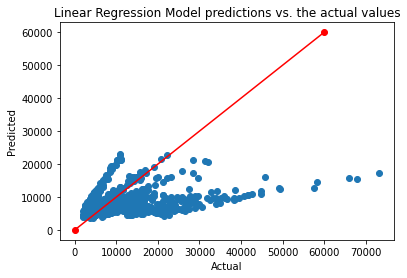

In [51]:
# 45degrees reference line
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(9,15)],[x for x in range(9,15)], color='red')

# Add the 45-degree reference line
# This draws a line segment between x and y
# where x and y are arrays containg the coordinates
# of the points. In this case we need two pairs
x = [0, 60000]
y = [0, 60000]
plt.plot(x, y, 'ro-')

# Label it
plt.title("Linear Regression Model predictions vs. the actual values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [52]:
pip install -U seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Residual histogram from Test Data')

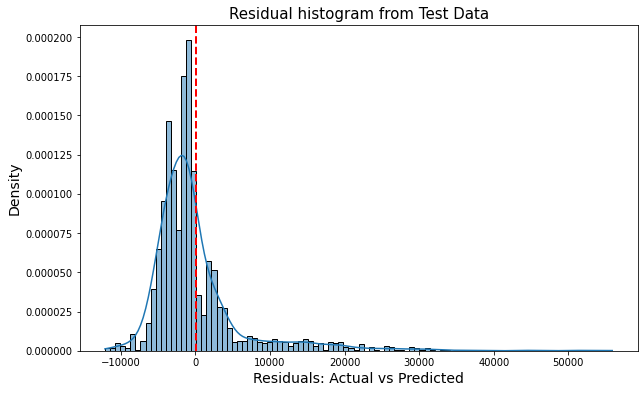

In [53]:
# Residual Histogram on test data
fig, ax= plt.subplots(figsize=(10,6))
sns.histplot(data=y_test-y_pred, ax=ax, stat="density", linewidth=1, kde=True, bins=100);
ax.axvline(x=np.mean(y_test-y_pred),color= 'r', ls='--', linewidth=2)
ax.set_xlabel('Residuals: Actual vs Predicted', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title('Residual histogram from Test Data', fontsize=15)

The following histogram of residuals suggests that the residuals (and hence the error terms) are not normally distributed. On the contrary, the distribution of the residuals is quite skewed and there are extreme outliers.

#### 5.2. Linear Regression with fewer features

In [54]:
df_1new.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,0,0,0,1,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,0,0,0,0,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,0,0,0,0,0,0,1,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
# Drop unnecessary categorical columns
df_2= df.drop(['State','Customer', 'Effective To Date', 'Location Code', 'Vehicle Class'], axis=1)

In [56]:
# Convert categorical columns to dummies
df_2new= pd.get_dummies(df_2, columns= ['Response','Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Size'], drop_first= True)

In [57]:
df_2new.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Response_Yes,Coverage_Extended,...,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,1,...,0,0,0,1,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
# Import the Standard Scaler from sklearn library
from sklearn.preprocessing import StandardScaler

# Identify target and independent features
X1= df_2new.drop('Customer Lifetime Value', axis=1).values
y1= df_2new['Customer Lifetime Value'].values

# Set up the Scaler
scaler= StandardScaler()

X1_scaled = scaler.fit_transform(X1)

In [59]:
# Split the data into train and test sets
X1_train, X1_test, y1_train, y1_test= train_test_split (X1_scaled, y1, test_size=0.2, random_state=42)

In [60]:
# Import Linear Regression model from sklearn
# Import metrics to measure model performance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg=LinearRegression(normalize=True)

# Fit the model to the training dataset
reg.fit(X1_train, y1_train)

# Predict the testing dataset
y1_pred= reg.predict(X1_test)

# Determine model accuracy
# The coefficient of determination: R squared: default is 0.5, 1 is perfect
print("R2: %.2f" % r2_score(y1_test, y1_pred))

# The Mean Absolute Percentage error
import numpy as np

def mean_absolute_percentage_error(y1_test, y1_pred): 

    y1_test, y1_pred = np.array(y_test), np.array(y1_pred)
    return np.mean(np.abs((y1_test - y1_pred) / y1_test)) * 100
print("Mean Absolute Percentage Error: %.2f" % mean_absolute_percentage_error(y1_test, y1_pred))

R2: 0.16
Mean Absolute Percentage Error: 61.47


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Text(0, 0.5, 'Predicted')

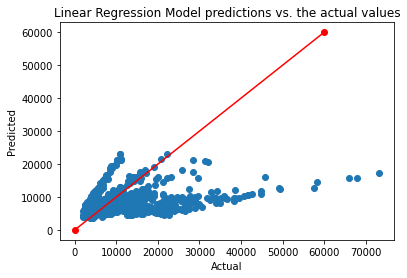

In [61]:
# 45degrees reference line
# Build a scatterplot
plt.scatter(y1_test, y1_pred)

# Add a line for perfect correlation
plt.plot([x1 for x1 in range(9,15)],[x1 for x1 in range(9,15)], color='red')

# Add the 45-degree reference line
# This draws a line segment between x and y
# where x and y are arrays containg the coordinates
# of the points. In this case we need two pairs
x1 = [0, 60000]
y1 = [0, 60000]
plt.plot(x1, y1, 'ro-')

# Label it
plt.title("Linear Regression Model predictions vs. the actual values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0.5, 1.0, 'Residual histogram from Test Data')

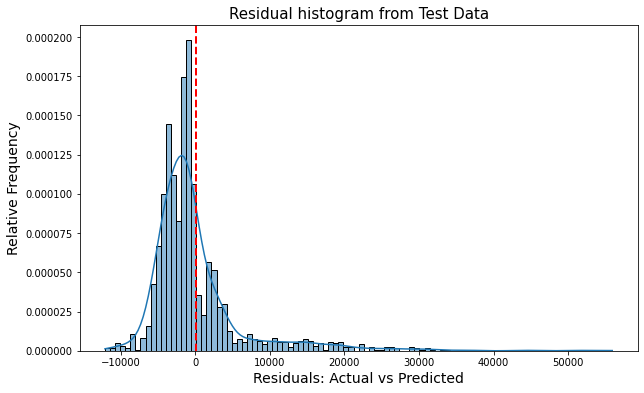

In [62]:
# Residual Histogram on test data
fig1, ax1= plt.subplots(figsize=(10,6))
sns.histplot(data=y1_test-y1_pred, ax=ax1, stat="density", linewidth=1, kde=True, bins=100);
ax1.axvline(x=np.mean(y1_test-y1_pred),color= 'r', ls='--', linewidth=2)
ax1.set_xlabel('Residuals: Actual vs Predicted', fontsize=14)
ax1.set_ylabel('Relative Frequency', fontsize=14)
ax1.set_title('Residual histogram from Test Data', fontsize=15)

We definitely see that the residuals (and hence the error terms) are not normally distributed. On the contrary, the distribution of the residuals is quite skewed and there are extreme outliers. Several nuances in the dataset might have caused this inaccuracy. For instance, we might end up having too many variables after converting categorical variables to dummy variables. Also, we must take into the consideration that the Linear regression performs poorly when there are non-linear relationships. 


##### 5.3. Random Forest

In [63]:
# Import the Standard Scaler from sklearn library
from sklearn.preprocessing import StandardScaler

# Identify target and independent features
X2= df_2new.drop('Customer Lifetime Value', axis=1).values
y2= df_2new['Customer Lifetime Value'].values

# Set up the Scaler
scaler= StandardScaler()

X2_scaled = scaler.fit_transform(X2)

In [64]:
# Split the data into train and test sets
X2_train, X2_test, y2_train, y2_test= train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

In [65]:
# Import Random Forest Regressor from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import random

random_forest = RandomForestRegressor()

# Fit the model to the training dataset
random_forest.fit(X2_train, y2_train)

# Predict the testing dataset
y2_pred = random_forest.predict(X2_test) 

# Determine model accuracy
# The coefficient of determination: R squared: default is 0.5, 1 is perfect
print("R2: %.2f" % r2_score(y2_test, y2_pred))

# The Mean Absolute Percentage error
def mean_absolute_percentage_error(y2_test, y2_pred): 

    y2_test, y2_pred = np.array(y2_test), np.array(y2_pred)
    return np.mean(np.abs((y2_test - y2_pred) / y2_test)) * 100
print("Mean Absolute Percentage Error: %.2f" % mean_absolute_percentage_error(y2_test, y2_pred))





R2: 0.69
Mean Absolute Percentage Error: 10.20


Text(0, 0.5, 'Predicted')

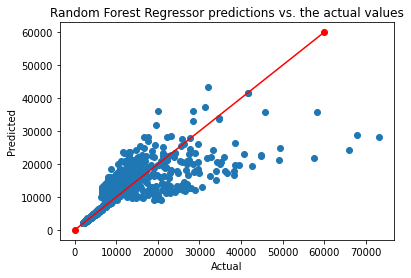

In [66]:
# 45degrees reference line
# Build a scatterplot
plt.scatter(y2_test, y2_pred)

# Add a line for perfect correlation
plt.plot([x for x2 in range(9,15)],[x2 for x2 in range(9,15)], color='red')

# Add the 45-degree reference line
# This draws a line segment between x and y
# where x and y are arrays containg the coordinates
# of the points. In this case we need two pairs
x2 = [0, 60000]
y_alt = [0, 60000]
plt.plot(x2, y_alt, 'ro-')

# Label it
plt.title("Random Forest Regressor predictions vs. the actual values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0.5, 1.0, 'Residual histogram from Test Data')

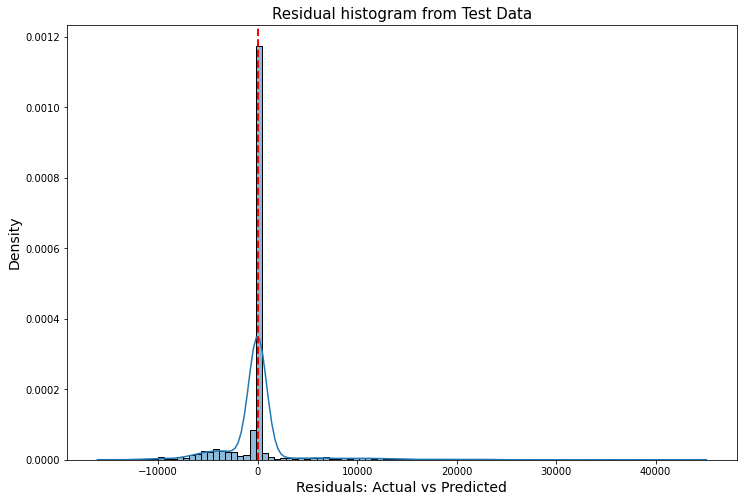

In [67]:
#Residual Histogram on test data
fig2, ax2= plt.subplots(figsize=(12,8))
sns.histplot(data=y2_test-y2_pred, ax=ax2, stat="density", linewidth=1, kde=True, bins=100);
ax2.axvline(x=np.mean(y2_test-y2_pred),color= 'r', ls='--', linewidth=2)
ax2.set_xlabel('Residuals: Actual vs Predicted', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Residual histogram from Test Data', fontsize=15)

 Residuals are more normally distributed and with less outliers. Random Forest performed well with this dataset. 

In [68]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X2_train, y2_train)
y_pred_alt = GSCV.predict(X2_test)

# The Mean Absolute Percentage error
def mean_absolute_percentage_error(y2_test, y_pred_alt): 

    y2_test, y_pred_alt = np.array(y2_test), np.array(y_pred_alt)
    return np.mean(np.abs((y2_test - y_pred_alt) / y2_test)) * 100
print("Mean Absolute Percentage Error: %.2f" % mean_absolute_percentage_error(y2_test, y_pred_alt))

# The coefficient of determination: R squared: default is 0.5, 1 is perfect
print("R2: %.2f" % r2_score(y2_test, y_pred_alt))






Mean Absolute Percentage Error: 11.02
R2: 0.68


Text(0, 0.5, 'Predicted')

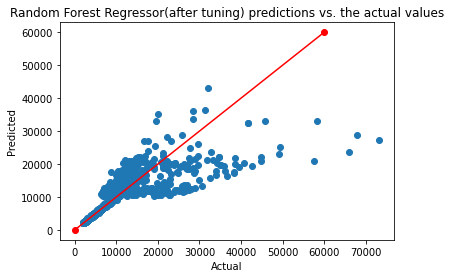

In [69]:
# 45degrees reference line
# Build a scatterplot
plt.scatter(y2_test, y_pred_alt)

# Add a line for perfect correlation
plt.plot([x3 for x3 in range(9,15)],[x3 for x3 in range(9,15)], color='red')

# Add the 45-degree reference line
# This draws a line segment between x and y
# where x and y are arrays containg the coordinates
# of the points. In this case we need two pairs
x3 = [0, 60000]
y3 = [0, 60000]
plt.plot(x3, y3, 'ro-')

# Label it
plt.title("Random Forest Regressor(after tuning) predictions vs. the actual values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(0.5, 1.0, 'Residual histogram from Test Data')

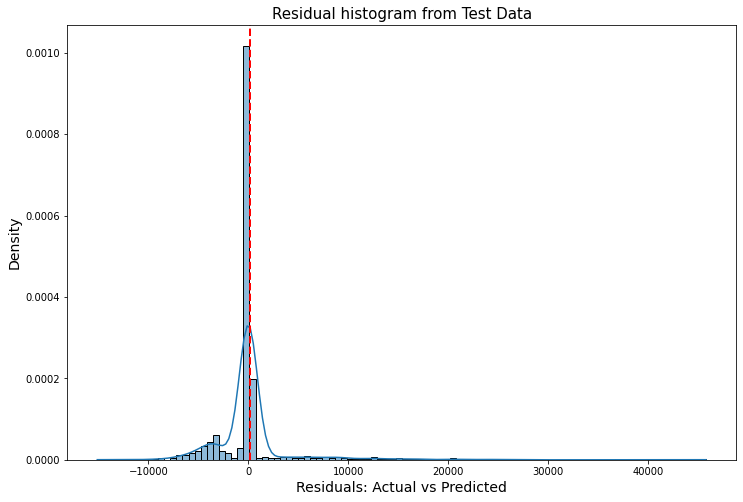

In [70]:
# Residual Histogram on test data
fig3, ax3= plt.subplots(figsize=(12,8))
sns.histplot(data=y2_test-y_pred_alt, ax=ax3, stat="density", linewidth=1, kde=True, bins=100);
ax3.axvline(x=np.mean(y2_test-y_pred_alt),color= 'r', ls='--', linewidth=2)
ax3.set_xlabel('Residuals: Actual vs Predicted', fontsize=14)
ax3.set_ylabel('Density', fontsize=14)
ax3.set_title('Residual histogram from Test Data', fontsize=15)

In [71]:
# Feature importance- Random Forestfrom sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance

plt.rcParams.update({'figure.figsize': (16.0, 12.0)})
plt.rcParams.update({'font.size': 14})


Text(0.5, 0, 'Permutation Importance')

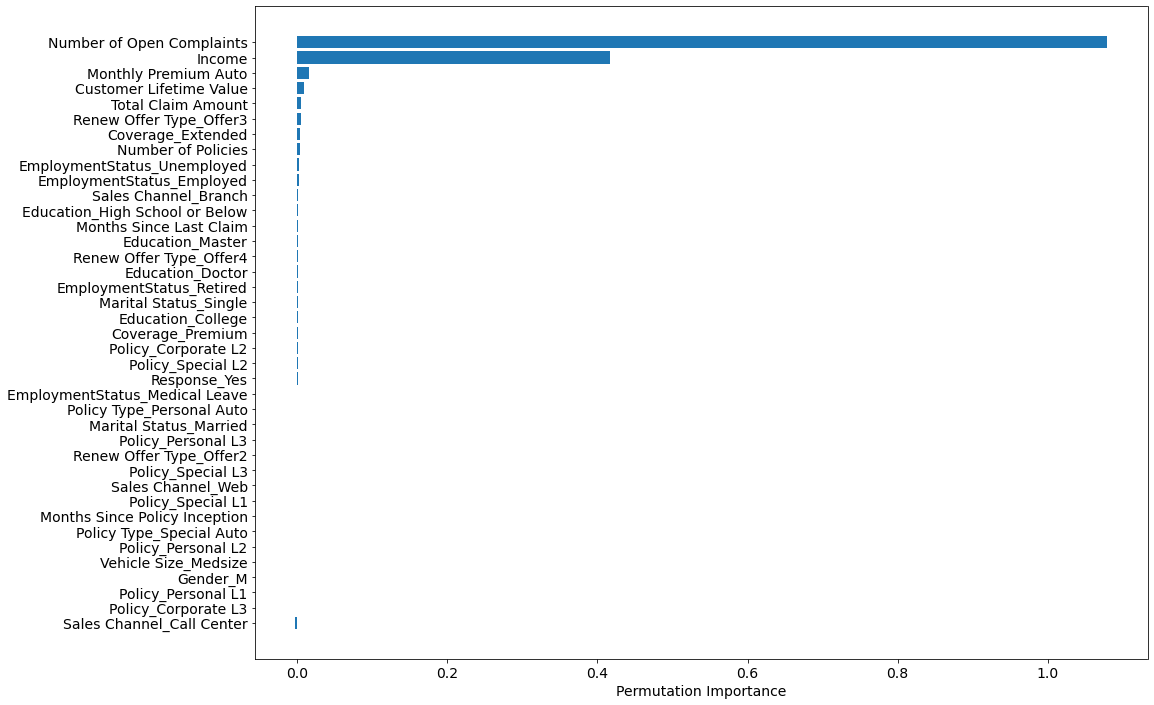

In [72]:
# Feature importance based on feature permutation

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(random_forest, X2_test, y2_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df_2new.columns.values[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

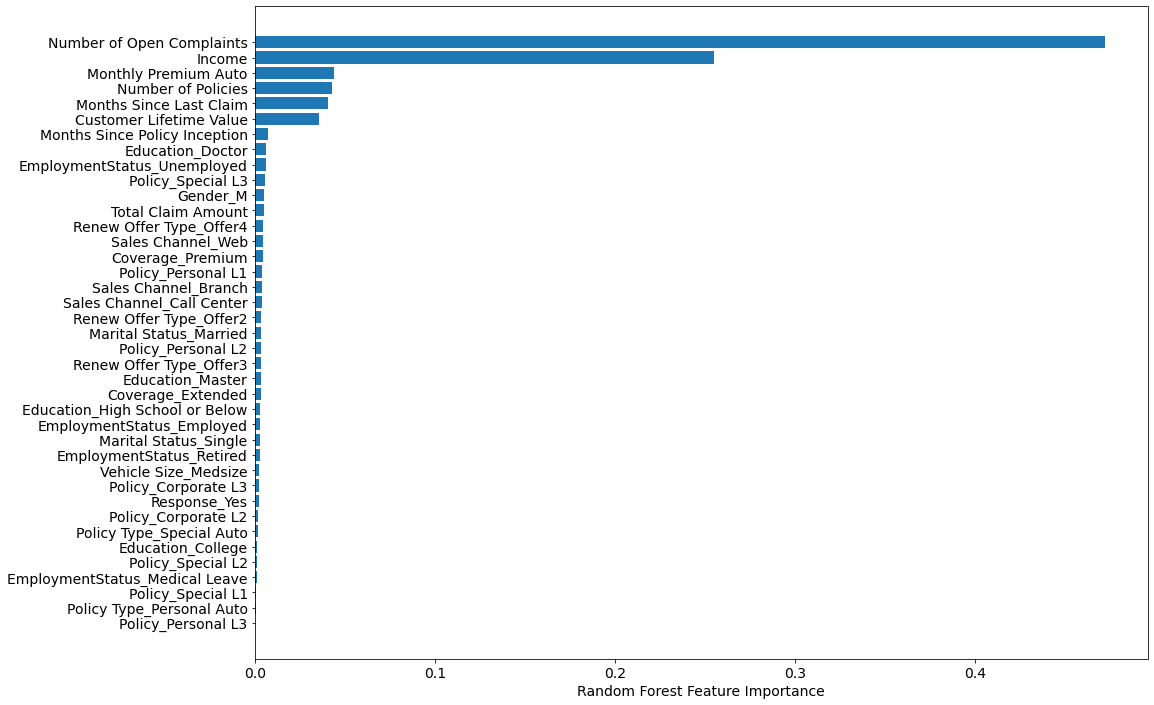

In [73]:
#  Feature importance based on Mean Decrease in Imputation
sorted_idx = random_forest.feature_importances_.argsort()
plt.barh(df_2new.columns.values[sorted_idx], random_forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")